<a href="https://www.kaggle.com/code/aneeshdighe/bundesliga-eda?scriptVersionId=138476441" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bundesliga-soccer-player/bundesliga_player.csv


In [2]:
data=pd.read_csv('/kaggle/input/bundesliga-soccer-player/bundesliga_player.csv')
data.head()

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,1,Yann Sommer,NaN,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,2,Sven Ulreich,NaN,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,3,Johannes Schenk,NaN,20,1.91,Germany,Schweinfurt,0.3,0.3,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,4,Matthijs de Ligt,NaN,23,1.89,Netherlands,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        515 non-null    int64  
 1   name              515 non-null    object 
 2   full_name         229 non-null    object 
 3   age               515 non-null    int64  
 4   height            515 non-null    float64
 5   nationality       515 non-null    object 
 6   place_of_birth    510 non-null    object 
 7   price             510 non-null    float64
 8   max_price         510 non-null    float64
 9   position          515 non-null    object 
 10  shirt_nr          515 non-null    int64  
 11  foot              506 non-null    object 
 12  club              515 non-null    object 
 13  contract_expires  481 non-null    object 
 14  joined_club       515 non-null    object 
 15  player_agent      488 non-null    object 
 16  outfitter         193 non-null    object 
dt

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt 
import math
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


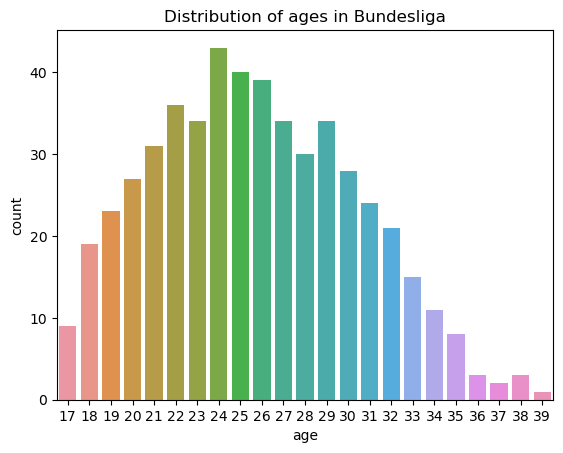

In [5]:
sns.countplot(x=data['age'])
plt.title('Distribution of ages in Bundesliga')
plt.show()

In [6]:
avg_age=data['age'].sum()
no_age=data['age'].value_counts().sum()
print("The average age of a player in Bundesliga is: ",round((avg_age/no_age),1))

The average age of a player in Bundesliga is:  25.7


In [7]:
##Fill NaN values with Unknown
data['outfitter']=data['outfitter'].fillna('Unknown')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'adidas'),
  Text(1, 0, 'Puma'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Nike'),
  Text(4, 0, 'New Balance'),
  Text(5, 0, 'Uhlsport'),
  Text(6, 0, 'Under Armour'),
  Text(7, 0, 'HashtagOne'),
  Text(8, 0, 'Stanno'),
  Text(9, 0, 'Mizuno')])

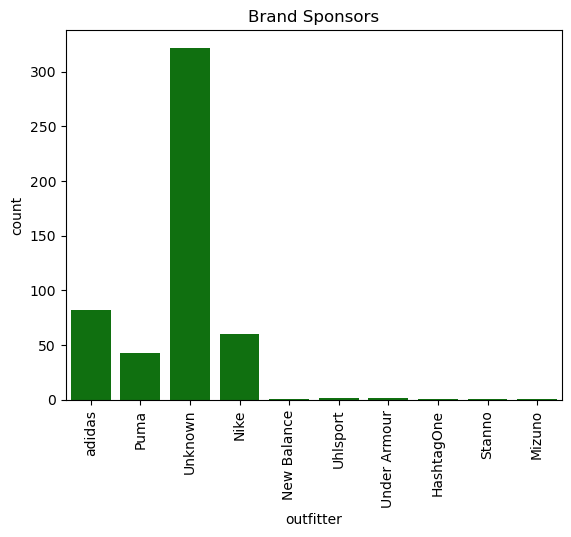

In [8]:
sns.countplot(x=data['outfitter'],color='green')
plt.title('Brand Sponsors')
plt.xticks(rotation=90)

In [9]:
data.isna().sum()

Unnamed: 0            0
name                  0
full_name           286
age                   0
height                0
nationality           0
place_of_birth        5
price                 5
max_price             5
position              0
shirt_nr              0
foot                  9
club                  0
contract_expires     34
joined_club           0
player_agent         27
outfitter             0
dtype: int64

In [10]:
data=data.fillna('')

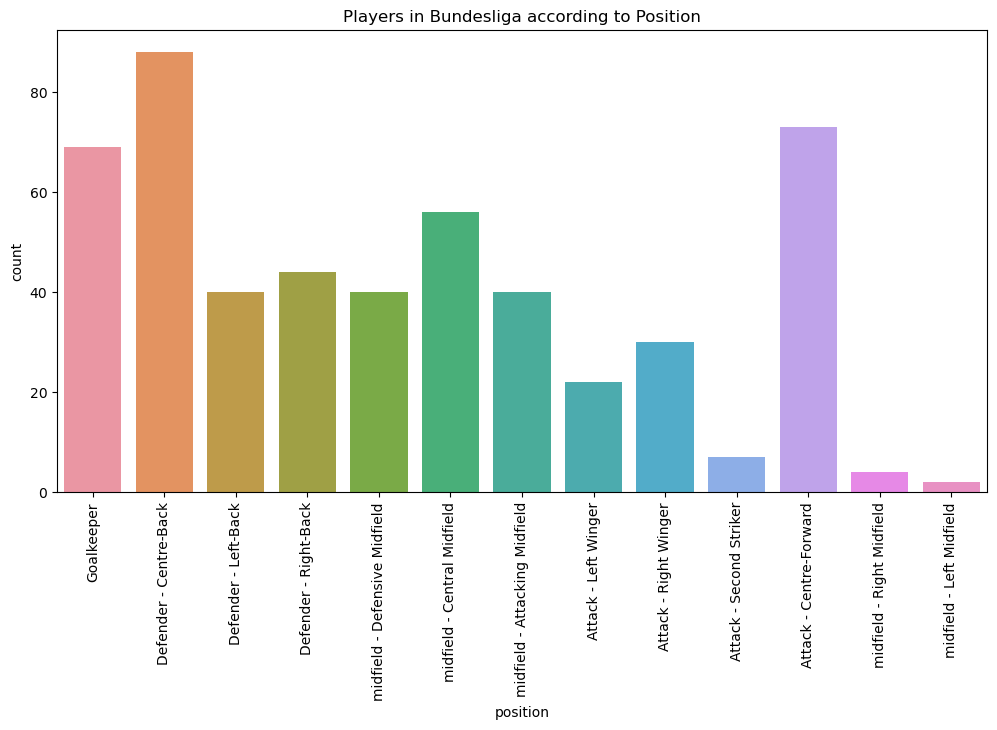

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x=data['position'])
plt.xticks(rotation=90)
plt.title('Players in Bundesliga according to Position')
plt.show()
#data['position'].value_counts()

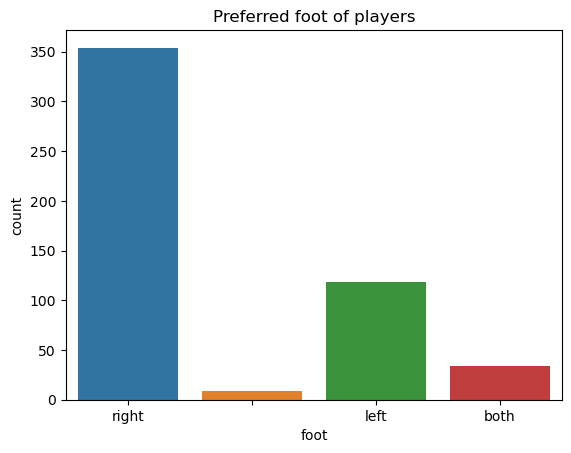

In [12]:
sns.countplot(x=data['foot'])
plt.title('Preferred foot of players')
plt.show()

In [13]:
import pandas as pd
data['max_price'] = pd.to_numeric(data['max_price'], errors='coerce')
data['price'] = pd.to_numeric(data['price'], errors='coerce')
# Assuming 'data' is your DataFrame with 'max_price' and 'price' columns converted to numeric types
data['range'] = data['max_price'] - data['price']

# Get the index of the 'max_price' column



In [14]:
data.head()

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,range
0,0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas,38.0
1,1,Yann Sommer,,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma,8.0
2,2,Sven Ulreich,,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas,5.1
3,3,Johannes Schenk,,20,1.91,Germany,Schweinfurt,0.3,0.3,Goalkeeper,35,,Bayern Munich,2024-06-30,2022-07-01,11WINS,Unknown,0.0
4,4,Matthijs de Ligt,,23,1.89,Netherlands,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas,0.0


In [15]:
max_price_index = data.columns.get_loc('max_price')

# Insert the 'range' column next to 'max_price' column
data.insert(max_price_index + 1,'Range', data['range'])

In [16]:
data.head()

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,Range,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,range
0,0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.0,45.0,38.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas,38.0
1,1,Yann Sommer,,34,1.83,Switzerland,Morges,5.0,13.0,8.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma,8.0
2,2,Sven Ulreich,,34,1.92,Germany,Schorndorf,0.9,6.0,5.1,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas,5.1
3,3,Johannes Schenk,,20,1.91,Germany,Schweinfurt,0.3,0.3,0.0,Goalkeeper,35,,Bayern Munich,2024-06-30,2022-07-01,11WINS,Unknown,0.0
4,4,Matthijs de Ligt,,23,1.89,Netherlands,Leiderdorp,75.0,75.0,0.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas,0.0


In [17]:
data=data.drop(['range'],axis=1)

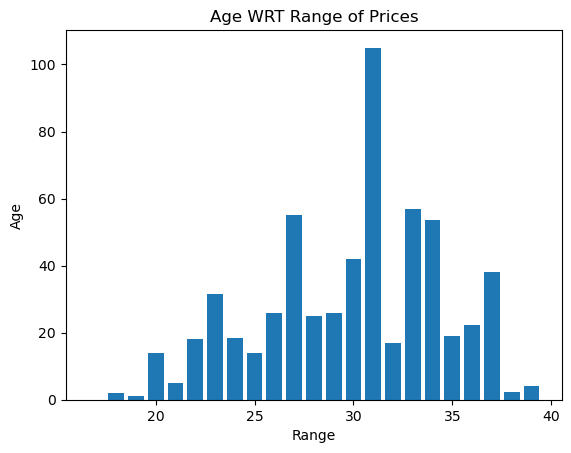

In [18]:
plt.bar(data['age'],data['Range'])
plt.xlabel('Range')
plt.ylabel('Age')
plt.title('Age WRT Range of Prices')
plt.show()

In [19]:
data['shirt_nr']=data['shirt_nr'].fillna(0)

In [20]:
data['joined_club']=pd.to_datetime(data['joined_club'],yearfirst=True)

In [21]:
data['contract_expires']=pd.to_datetime(data['contract_expires'],yearfirst=True)

In [22]:
data['contract_expires'].head()

0   2024-06-30
1   2025-06-30
2   2024-06-30
3   2024-06-30
4   2027-06-30
Name: contract_expires, dtype: datetime64[ns]

In [23]:
data1=data.copy()

In [24]:
data1.dtypes

Unnamed: 0                   int64
name                        object
full_name                   object
age                          int64
height                     float64
nationality                 object
place_of_birth              object
price                      float64
max_price                  float64
Range                      float64
position                    object
shirt_nr                     int64
foot                        object
club                        object
contract_expires    datetime64[ns]
joined_club         datetime64[ns]
player_agent                object
outfitter                   object
dtype: object

In [25]:
from datetime import datetime
import pandas as pd

current_year = datetime.now().year
data1['contract_expires'] = pd.to_datetime(data1['contract_expires'])  # Convert to datetime if needed
data1['contract_years'] = data1['contract_expires'].dt.year - current_year
data1=data1.drop(['contract_expires'],axis=1)

In [26]:
data1.columns

Index(['Unnamed: 0', 'name', 'full_name', 'age', 'height', 'nationality',
       'place_of_birth', 'price', 'max_price', 'Range', 'position', 'shirt_nr',
       'foot', 'club', 'joined_club', 'player_agent', 'outfitter',
       'contract_years'],
      dtype='object')

In [27]:
data1['contract_years'].isna().sum()

34

In [28]:
data1['contract_years']=data1['contract_years'].fillna(0)

In [29]:
data1['contract_years'].isna().sum()

0

Text(0.5, 1.0, 'Contract Years of players in the Bundesliga')

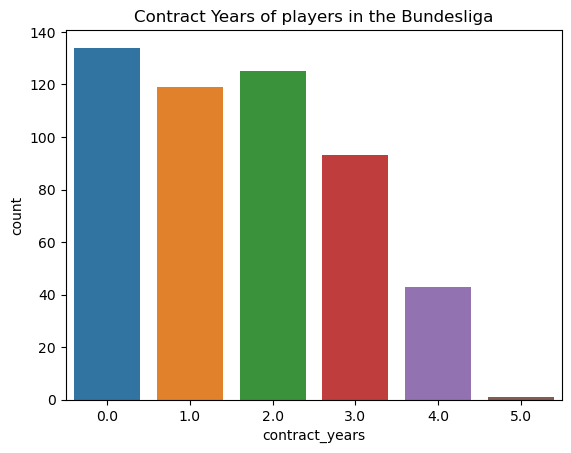

In [30]:
sns.countplot(x=data1['contract_years'])
plt.title('Contract Years of players in the Bundesliga')

In [31]:
import pandas as pd

# Assuming 'data1' is your DataFrame with 'joined_club' column
data1['joined_club'] = pd.to_datetime(data1['joined_club'])

# Calculate the difference in years from the current date
current_date = pd.to_datetime('today')
data1['joined_years'] = (current_date - data1['joined_club']).astype('<m8[Y]')

# Drop the original "joined_club" column without using inplace=True
data1.drop('joined_club', axis=1, inplace=True)


In [32]:
data1['joined_years'].value_counts()

1.0     161
2.0      94
0.0      77
4.0      50
3.0      46
5.0      19
7.0      18
8.0      15
6.0       9
9.0       9
11.0      5
12.0      4
10.0      3
13.0      3
14.0      2
Name: joined_years, dtype: int64

In [33]:
data1['joined_from']=data1['joined_years'].astype(int)

In [34]:
data1.drop(['joined_from'],axis=1)

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,Range,position,shirt_nr,foot,club,player_agent,outfitter,contract_years,joined_years
0,0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.00,45.0,38.00,Goalkeeper,1,right,Bayern Munich,PRO Profil GmbH,adidas,1.0,12.0
1,1,Yann Sommer,,34,1.83,Switzerland,Morges,5.00,13.0,8.00,Goalkeeper,27,right,Bayern Munich,Relatives,Puma,2.0,0.0
2,2,Sven Ulreich,,34,1.92,Germany,Schorndorf,0.90,6.0,5.10,Goalkeeper,26,right,Bayern Munich,BMS Sportconsulting ...,adidas,1.0,2.0
3,3,Johannes Schenk,,20,1.91,Germany,Schweinfurt,0.30,0.3,0.00,Goalkeeper,35,,Bayern Munich,11WINS,Unknown,1.0,1.0
4,4,Matthijs de Ligt,,23,1.89,Netherlands,Leiderdorp,75.00,75.0,0.00,Defender - Centre-Back,4,right,Bayern Munich,Rafaela Pimenta,adidas,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,510,Takuma Asano,浅野 拓磨,28,1.73,Japan,"Komono, Mie",4.00,4.0,0.00,Attack - Right Winger,11,right,VfL Bochum,JEB ENTERTAINMENT ...,adidas,1.0,2.0
511,511,Philipp Hofmann,,30,1.95,Germany,Arnsberg,2.50,2.5,0.00,Attack - Centre-Forward,33,left,VfL Bochum,ROOF,Unknown,1.0,1.0
512,512,Simon Zoller,Simon Martin Zoller,31,1.79,Germany,Friedrichshafen,1.10,3.0,1.90,Attack - Centre-Forward,9,right,VfL Bochum,GoalSky,Puma,1.0,4.0
513,513,Silvère Ganvoula,Silvère Ganvoula M'boussy,26,1.91,Congo,Brazzaville,0.75,2.5,1.75,Attack - Centre-Forward,35,right,VfL Bochum,BY Sport Consulting,Puma,0.0,4.0
